# ISEL - CPS 
## Semestre 2020/21
# <br>
###  <center> Trabalho Prático </center>
# </br>

Trabalho realizado por:
* Aurizando Silva, <b> 47461 </b>
* Diana Silva, numero <b> 46308 </b>

data: 04/11/2020

A figura representa o esquema típico do processo de envio e recepção de informação usando modulações
digitais.

![fig_trab](esquemaCPS.png)

Este trabalho foca os blocos Codificação e descodificação do sinal.

Considere as funções já criadas em Python das aulas anteriores.

Construa uma função Python que dado um Numpy array (com dimensão $N$) com valores inteiros, retorne um Numpy array (com dimensão $N.R\times 1$) com os mesmos valores convertidos para binário.
Esta função ainda deve receber como parâmetros de entrada o número de bits ($R$) a usar na conversão de cada inteiro.




Construa uma função Python que dado um Numpy array (com dimensão $N$) com valores inteiros, retorne um Numpy array (com dimensão $N.R\times 1$) com os mesmos valores convertidos para binário.
Esta função ainda deve receber como parâmetros de entrada o número de bits ($R$) a usar na conversão de cada inteiro.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SNRTeorica(signal, VqMax, R):
    #potência do sinal
    P = sum(signal**2.)/len(signal)
    return 6.02 * R + 10 * (np.log10((3 * P) / (VqMax**2.)))

In [3]:
def Codific(arr_signal_quantized,R):
    
    representation = []
    
    if (arr_signal_quantized.ndim == 2):
        
        for y in range(len(arr_signal_quantized)):
            array = []
            for z in range(len(arr_signal_quantized[y])):
                        aux = np.binary_repr(arr_signal_quantized[y][z], width = R)
                        array.append(aux)
            representation.append(array)
                        
    else:
        
        for i in range(len(arr_signal_quantized)):
            aux = np.binary_repr(arr_signal_quantized[i], width = R)
            representation.append(aux)    
        
    arr_binary = np.array(representation)

    # resposta
    return arr_binary

In [4]:
a = np.array([2, 5, 7])

b = Codific(a, 3)
print(b)

['010' '101' '111']


Construa uma função que dado um Numpy array com valores os bits, faça a conversão para inteiros (considerando R bits).

In [5]:
def Descodific(arr_binary,R):
    #resposta
    
    arr_signal_aux = []
        
    if (arr_binary.ndim == 2):
        
        for y in range(len(arr_binary)):
            array = []
            for z in range(len(arr_binary[y])):
                int_aux = int(arr_binary[y][z], 2)
                array.append(int_aux) 
            arr_signal_aux.append(array)
                        
    else:
        
        for i in range(len(arr_binary)):

            int_aux = int(arr_binary[i], 2)
            arr_signal_aux.append(int_aux)    
        
        
    arr_signal = np.array(arr_signal_aux)

    return arr_signal 

In [6]:
a = np.array([2, 5, 7])

b = Codific(a, 3)

print(Descodific(b, 3))

[2 5 7]


Com base nas funções já implementadas, faça a codificação e descodificação PCM uniforme do sinal de áudio previamente gravado.
Verifique qual a SNR obtida e ouça o sinal descodificado. 
Use para o efeito R=3, 5 e 8.

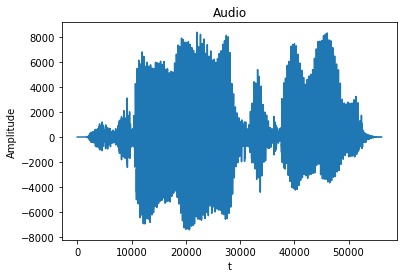

In [7]:
#Resposta:

import scipy.io.wavfile as wav
from scipy.io.wavfile import read
from IPython.display import display, Audio

fs,data=wav.read('sanae.wav')
voz = data[:,0]
display(Audio(data=voz, rate=fs))


ficheiro_audio2 = np.array(voz, dtype = int)

plt.plot(voz)
plt.title("Audio")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()

SNR = 91.1457075569293


<ipython-input-3-baa37a6745e5>:17: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  aux = np.binary_repr(arr_signal_quantized[i], width = R)


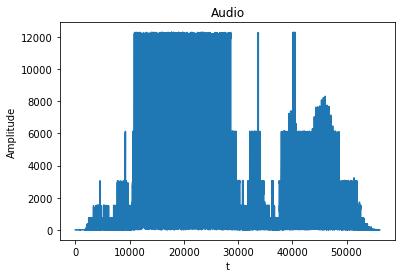

In [8]:
#R = 3

#Codificacao
sinal_codificado = Codific(ficheiro_audio2, 3)
#print(sinal_codificado)

#Descodificacao
sinal_descodificado = Descodific(sinal_codificado, 3)
#print(sinal_descodificado)

#SNR
snr = SNRTeorica(ficheiro_audio2, 1, 3)
print("SNR = {}".format(snr))

voz = sinal_descodificado
display(Audio(data=voz, rate=fs))

plt.plot(voz)
plt.title("Audio")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()

SNR = 103.18570755692929


<ipython-input-3-baa37a6745e5>:17: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  aux = np.binary_repr(arr_signal_quantized[i], width = R)


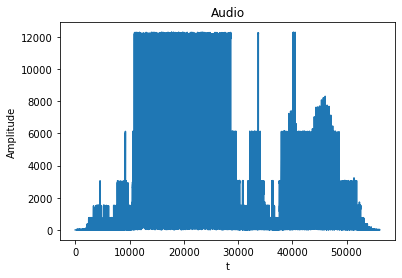

In [9]:
#R = 5

#Codificacao
sinal_codificado = Codific(ficheiro_audio2, 5)
#print(sinal_codificado)

#Descodificacao
sinal_descodificado = Descodific(sinal_codificado, 5)
#print(sinal_descodificado)

#SNR
snr = SNRTeorica(ficheiro_audio2, 1, 5)
print("SNR = {}".format(snr))

voz = sinal_descodificado
display(Audio(data=voz, rate=fs))

plt.plot(voz)
plt.title("Audio")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()

SNR = 121.24570755692929


<ipython-input-3-baa37a6745e5>:17: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  aux = np.binary_repr(arr_signal_quantized[i], width = R)


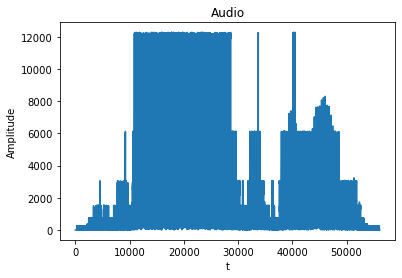

In [10]:
#R = 8

#Codificacao
sinal_codificado = Codific(ficheiro_audio2, 8)
#print(sinal_codificado)

#Descodificacao
sinal_descodificado = Descodific(sinal_codificado, 8)
#print(sinal_descodificado)

#SNR
snr = SNRTeorica(ficheiro_audio2, 1, 8)
print("SNR = {}".format(snr))

voz = sinal_descodificado
display(Audio(data=voz, rate=fs))

plt.plot(voz)
plt.title("Audio")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.show()

Faça o mesmo teste mas agora com a imagem fornecida para o trabalho.
comente os resultados obtidos.

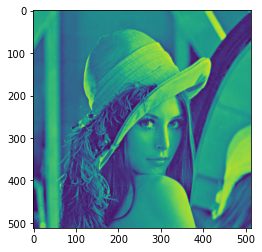

In [11]:
#Resposta:
from PIL import Image

im = Image.open("lena_gray.png")
data = np.asarray(im)

#SNR
#snr = SNRTeorica(data, 1, 3)
#print("SNR = {}".format(snr))

plt.imshow(im)
plt.show()
im.show()

<ipython-input-3-baa37a6745e5>:10: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  aux = np.binary_repr(arr_signal_quantized[y][z], width = R)


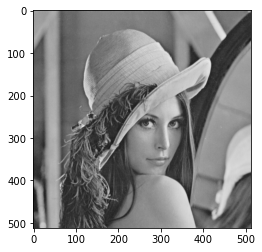

In [12]:
#R = 3

#Codificacao
imagem_codificada = Codific(data, 3)

#Descodificacao
imagem_descodificada = Descodific(imagem_codificada, 3)

im2 = Image.fromarray(imagem_descodificada)

plt.imshow(im2)
plt.show()

im2.show()

resposta


<ipython-input-3-baa37a6745e5>:10: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  aux = np.binary_repr(arr_signal_quantized[y][z], width = R)


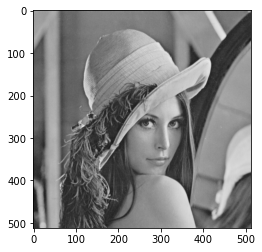

In [13]:
#R = 5

#Codificacao
imagem_codificada = Codific(data, 5)

#Descodificacao
imagem_descodificada = Descodific(imagem_codificada, 5)

im2 = Image.fromarray(imagem_descodificada)

plt.imshow(im2)
plt.show()

im2.show()

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


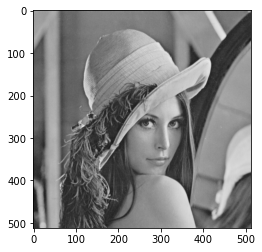

In [14]:
#R = 8

#Codificacao
imagem_codificada = Codific(data, 8)

#Descodificacao
imagem_descodificada = Descodific(imagem_codificada, 8)

im2 = Image.fromarray(imagem_descodificada)

print(imagem_descodificada)

plt.imshow(im2)
plt.show()

im2.show()

Como era esperado a qualidade da imagem vai reduzindo, devido à perda de informação advinda da codificação.